### Competition Link:
[click here](https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-employee-attrition-rate/machine-learning/predict-the-employee-attrition-rate-in-organizations-1d700a97) 

### Problem statement
Employees are the most important part of an organization. Successful employees meet deadlines, make sales, and build the brand through positive customer interactions.

Employee attrition is a major cost to an organization and predicting such attritions is the most important requirement of the Human Resources department in many organizations. In this problem, your task is to predict the attrition rate of employees of an organization. 

### Data
    * Train.csv
    * Test.csv

### Submission format
You are required to write your predictions in a .csv file that contain the following columns:
    * Employee_ID
    * Attrition_rate

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [94]:
# Load the dataset as trainning data and submission data
data = pd.read_csv('D:\HackerEarth-Will-your-employees-leave-you\Dataset\Train.csv')
submission_data = pd.read_csv('D:\HackerEarth-Will-your-employees-leave-you\Dataset\Test.csv')

In [95]:
print(data.shape)
print(submission_data.shape)

(7000, 24)
(3000, 23)


In [96]:
data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [97]:
data.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


## Observation after many iterations 
    * mean value ->(null value replace with mean will get 81.208% score)
    * 75% value ->(null value replace with mean will get 81.283% score)
    * Highest score is 81.668%

In [99]:
data.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [100]:
column_names = data.columns.tolist()
column_names

['Employee_ID',
 'Gender',
 'Age',
 'Education_Level',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Time_of_service',
 'Time_since_promotion',
 'growth_rate',
 'Travel_Rate',
 'Post_Level',
 'Pay_Scale',
 'Compensation_and_Benefits',
 'Work_Life_balance',
 'VAR1',
 'VAR2',
 'VAR3',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'Attrition_rate']

In [101]:
column_names.remove('Attrition_rate')
column_names.remove('Employee_ID')
column_names

['Gender',
 'Age',
 'Education_Level',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Time_of_service',
 'Time_since_promotion',
 'growth_rate',
 'Travel_Rate',
 'Post_Level',
 'Pay_Scale',
 'Compensation_and_Benefits',
 'Work_Life_balance',
 'VAR1',
 'VAR2',
 'VAR3',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7']

# Feature Selection:
1. [DataCamp](https://www.datacamp.com/community/tutorials/xgboost-in-python)
2. [towardsdatascience.com](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e#:~:text=You%20can%20get%20the%20feature,feature%20towards%20your%20output%20variable.)
3. [analyticsvidhya](https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling)
4. [machinelearningmastery](https://machinelearningmastery.com/feature-selection-with-categorical-data)


In [106]:
for feature in column_names:
    if data[feature].dtype == 'object':
        data[feature] = data[feature].astype('category')
        data[feature] = data[feature].cat.codes

In [107]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [108]:
X, y = data[column_names].values, data['Attrition_rate'].values
data_dmatrix = xgb.DMatrix(data=X, label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train, y_train)

[01:36:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [109]:
preds = xg_reg.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.193051


In [110]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': preds.flatten()})
df

,Actual,Predicted
0,0.5313,0.197090
1,0.1746,0.198412
2,0.0356,0.186199
3,0.1003,0.200609
4,0.4263,0.150757
...,...,...
1395,0.4634,0.202391
1396,0.0411,0.214601
1397,0.0642,0.223156
1398,0.0834,0.214094


In [111]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.01,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[01:37:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [85]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [112]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.359276,0.000897,0.359273,0.001812
1,0.356666,0.000891,0.356662,0.001819
2,0.354089,0.000886,0.354086,0.001826
3,0.351544,0.000882,0.351542,0.001832
4,0.349032,0.000880,0.349030,0.001839


In [113]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.264846
Name: test-rmse-mean, dtype: float64


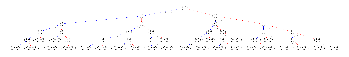

In [114]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

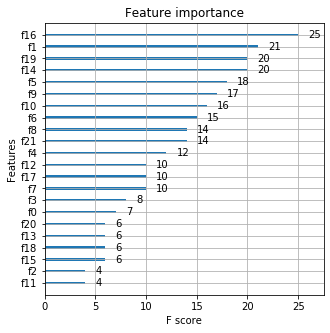

In [116]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [117]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

Mean Absolute Error: 0.1341639218895776
Mean Squared Error: 0.0372685899073811
Root Mean Squared Error: 0.1930507443844263


In [120]:
for i in range(len(column_names)):
    print(i, column_names[i])

0 Gender
1 Age
2 Education_Level
3 Relationship_Status
4 Hometown
5 Unit
6 Decision_skill_possess
7 Time_of_service
8 Time_since_promotion
9 growth_rate
10 Travel_Rate
11 Post_Level
12 Pay_Scale
13 Compensation_and_Benefits
14 Work_Life_balance
15 VAR1
16 VAR2
17 VAR3
18 VAR4
19 VAR5
20 VAR6
21 VAR7


In [184]:
important_features = [16, 1, 14, 5, 9, 10, 6, 8, 4, 12, 3, 0, 13, 2];
features = []
for i in important_features:
    features.append(column_names[i])
features

['VAR2',
 'Age',
 'Work_Life_balance',
 'Unit',
 'growth_rate',
 'Travel_Rate',
 'Decision_skill_possess',
 'Time_since_promotion',
 'Hometown',
 'Pay_Scale',
 'Relationship_Status',
 'Gender',
 'Compensation_and_Benefits',
 'Education_Level']

In [124]:
data[features].isna().sum()

VAR2                         577
Age                          412
Work_Life_balance             11
Unit                           0
growth_rate                    0
Travel_Rate                    0
Decision_skill_possess         0
Time_since_promotion           0
Hometown                       0
Pay_Scale                      9
Relationship_Status            0
Gender                         0
Compensation_and_Benefits      0
Education_Level                0
dtype: int64

In [142]:
data['VAR2'].fillna(0.751600, inplace=True)
data['Age'].fillna(52, inplace=True)
data['Work_Life_balance'].fillna(3, inplace=True)
data['Pay_Scale'].fillna(8, inplace=True)

In [145]:
X, y = data[features].values, data['Attrition_rate'].values
data_dmatrix = xgb.DMatrix(data=X, label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': preds.flatten()})
df

[02:08:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.193089


,Actual,Predicted
0,0.5313,0.221367
1,0.1746,0.175882
2,0.0356,0.179292
3,0.1003,0.196436
4,0.4263,0.198095
...,...,...
1395,0.4634,0.166960
1396,0.0411,0.220025
1397,0.0642,0.229281
1398,0.0834,0.176884


In [146]:
X, y = data[features].values, data['Attrition_rate'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

def prepare_inputs(X_train, X_test):
    ohe = OrdinalEncoder()
    ohe.fit(X_train)
    X_train_enc = ohe.transform(X_train)
    X_test_enc = ohe.transform(X_test)
    return X_train_enc, X_test_enc

X_train, X_test = prepare_inputs(X_train, X_test)

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


model = LinearRegression()
model.fit(X_train, y_train)

print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 0.19932674222981514
Coefficients: 
 [-0.00343203 -0.00015995  0.0026243   0.0017853   0.00019427 -0.00412863
  0.00371589  0.00189068  0.00160704 -0.00191533  0.00339453  0.00871093
 -0.00774184 -0.00091712]


In [148]:
output = model.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': output.flatten()})
df

,Actual,Predicted
0,0.1642,0.192531
1,0.0760,0.198257
2,0.2246,0.182815
3,0.3232,0.174049
4,0.1808,0.195152
...,...,...
1395,0.3332,0.191534
1396,0.0375,0.174291
1397,0.1613,0.203801
1398,0.1645,0.196064


In [149]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, output))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, output))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, output)))

Mean Absolute Error: 0.12125025574493106
Mean Squared Error: 0.03024589581739974
Root Mean Squared Error: 0.1739134722136262


In [150]:
submission_data['VAR2'].fillna(0.751600, inplace=True)
submission_data['Age'].fillna(52, inplace=True)
submission_data['Work_Life_balance'].fillna(3, inplace=True)
submission_data['Pay_Scale'].fillna(8, inplace=True)

In [151]:
XX = submission_data[features].values

ohe = OrdinalEncoder()
ohe.fit(XX)
XX = ohe.transform(XX)

In [152]:
y_predict = model.predict(XX)

import csv

with open('Output/6th_submission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Employee_ID", "Attrition_rate"])
    
    for i in range(3000):
        writer.writerow([submission_data['Employee_ID'][i], y_predict[i]])

In [189]:
features.remove('Education_Level')
features.remove('Compensation_and_Benefits')
# features.remove('Gender')
# features.remove('Relationship_Status')
# features.remove('Pay_Scale')
# features.remove('Hometown')

In [174]:
X, y = data[features].values, data['Attrition_rate'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

def prepare_inputs(X_train, X_test):
    ohe = OrdinalEncoder()
    ohe.fit(X_train)
    X_train_enc = ohe.transform(X_train)
    X_test_enc = ohe.transform(X_test)
    return X_train_enc, X_test_enc

X_train, X_test = prepare_inputs(X_train, X_test)


from sklearn.linear_model import LinearRegression
from sklearn import metrics


model = LinearRegression()
model.fit(X_train, y_train)

print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 0.1775355652706585
Coefficients: 
 [-0.00347024 -0.00016426  0.00283121  0.00174683  0.00019785 -0.00374987
  0.00370614  0.00182196]


In [175]:
output = model.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': output.flatten()})
df

,Actual,Predicted
0,0.1642,0.202014
1,0.0760,0.200158
2,0.2246,0.177426
3,0.3232,0.181849
4,0.1808,0.184827
...,...,...
1395,0.3332,0.201917
1396,0.0375,0.185634
1397,0.1613,0.198676
1398,0.1645,0.194407


In [176]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, output))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, output))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, output)))

Mean Absolute Error: 0.12125457248508754
Mean Squared Error: 0.030259619348931746
Root Mean Squared Error: 0.17395292279502447


In [177]:
XX = submission_data[features].values

ohe = OrdinalEncoder()
ohe.fit(XX)
XX = ohe.transform(XX)

In [179]:
y_predict = model.predict(XX)

import csv

with open('Output/8th_submission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Employee_ID", "Attrition_rate"])
    
    for i in range(3000):
        writer.writerow([submission_data['Employee_ID'][i], y_predict[i]])

In [180]:
from sklearn.linear_model import BayesianRidge, LinearRegression

In [190]:
X, y = data[features].values, data['Attrition_rate'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

def prepare_inputs(X_train, X_test):
    ohe = OrdinalEncoder()
    ohe.fit(X_train)
    X_train_enc = ohe.transform(X_train)
    X_test_enc = ohe.transform(X_test)
    return X_train_enc, X_test_enc

X_train, X_test = prepare_inputs(X_train, X_test)




model = BayesianRidge()
model.fit(X_train, y_train)

print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 0.1851798533650421
Coefficients: 
 [-0.00091267 -0.00013676  0.00071432  0.00134534  0.00019382 -0.00039386
  0.00096222  0.00046858  0.00040267 -0.0010644   0.00019377  0.00052343]


In [191]:
output = model.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': output.flatten()})
df

,Actual,Predicted
0,0.1642,0.195417
1,0.0760,0.197690
2,0.2246,0.187201
3,0.3232,0.181515
4,0.1808,0.186209
...,...,...
1395,0.3332,0.190032
1396,0.0375,0.188307
1397,0.1613,0.190321
1398,0.1645,0.195647


In [192]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, output))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, output))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, output)))

Mean Absolute Error: 0.12131787922080918
Mean Squared Error: 0.03030107604663654
Root Mean Squared Error: 0.1740720426910552


In [193]:
features

['VAR2',
 'Age',
 'Work_Life_balance',
 'Unit',
 'growth_rate',
 'Travel_Rate',
 'Decision_skill_possess',
 'Time_since_promotion',
 'Hometown',
 'Pay_Scale',
 'Relationship_Status',
 'Gender']